# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np   

import pandas as pd  

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


Load file 'diabetes.csv' from a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df

In [2]:
# Read the combined data in (combined data includes both Training and Submission file)

pima_df = pd.read_csv("diabetes.csv") 

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [41]:
pima_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
67,2,109,92,0,0,42.7,0.845,54,0
535,4,132,0,0,0,32.9,0.302,23,1
748,3,187,70,22,200,36.4,0.408,36,1
298,14,100,78,25,184,36.6,0.412,46,1
553,1,88,62,24,44,29.9,0.422,23,0
209,7,184,84,33,0,35.5,0.355,41,1
372,0,84,64,22,66,35.8,0.545,21,0
740,11,120,80,37,150,42.3,0.785,48,1
659,3,80,82,31,70,34.2,1.292,27,1
392,1,131,64,14,415,23.7,0.389,21,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [3]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

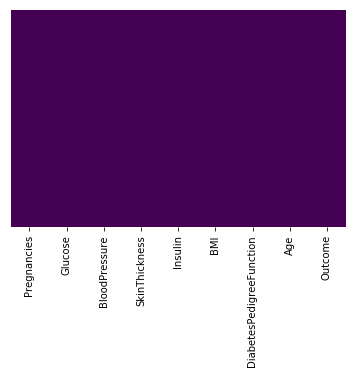

In [4]:
# No Null values
# descriptive stats show 0 values for Glucose	BloodPressure	SkinThickness	Insulin	BMI
sns.heatmap(pima_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Glucose,BloodPressure,SkinThickness,Insulin,BMI have 0 values , which is no value/Missing value
# Repalce 0 with null
# Replace null with median
# Variables missing at random - we do a median imputation
cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

pima_df[cols] = pima_df[cols].mask(pima_df[cols]==0)

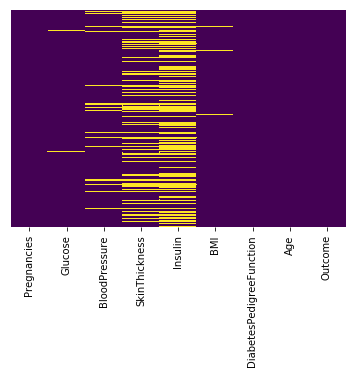

In [7]:
sns.heatmap(pima_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:

# Variables missing at random - we do a median imputation
cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

pima_df[cols] = pima_df[cols].fillna(pima_df[cols].median())

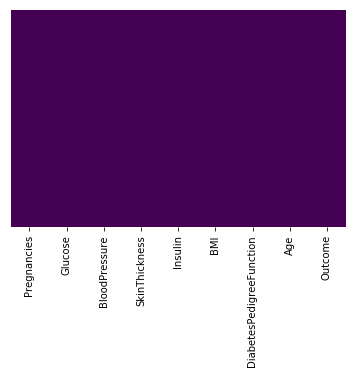

In [9]:
sns.heatmap(pima_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
pima_df.shape

(768, 9)

# Q5 Print the descriptive statistics of each & every column using describe() function

In [11]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [12]:
pima_df["Outcome"].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

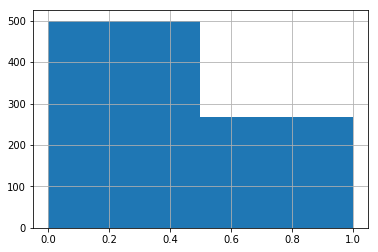

In [13]:

pima_df["Outcome"].hist(bins=[0,0.5,1])


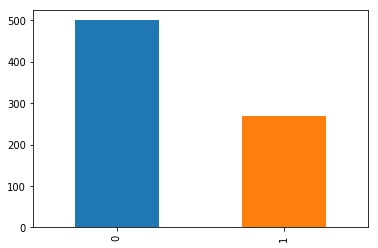

In [14]:
pima_df["Outcome"].value_counts().sort_index().plot.bar()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\shank\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


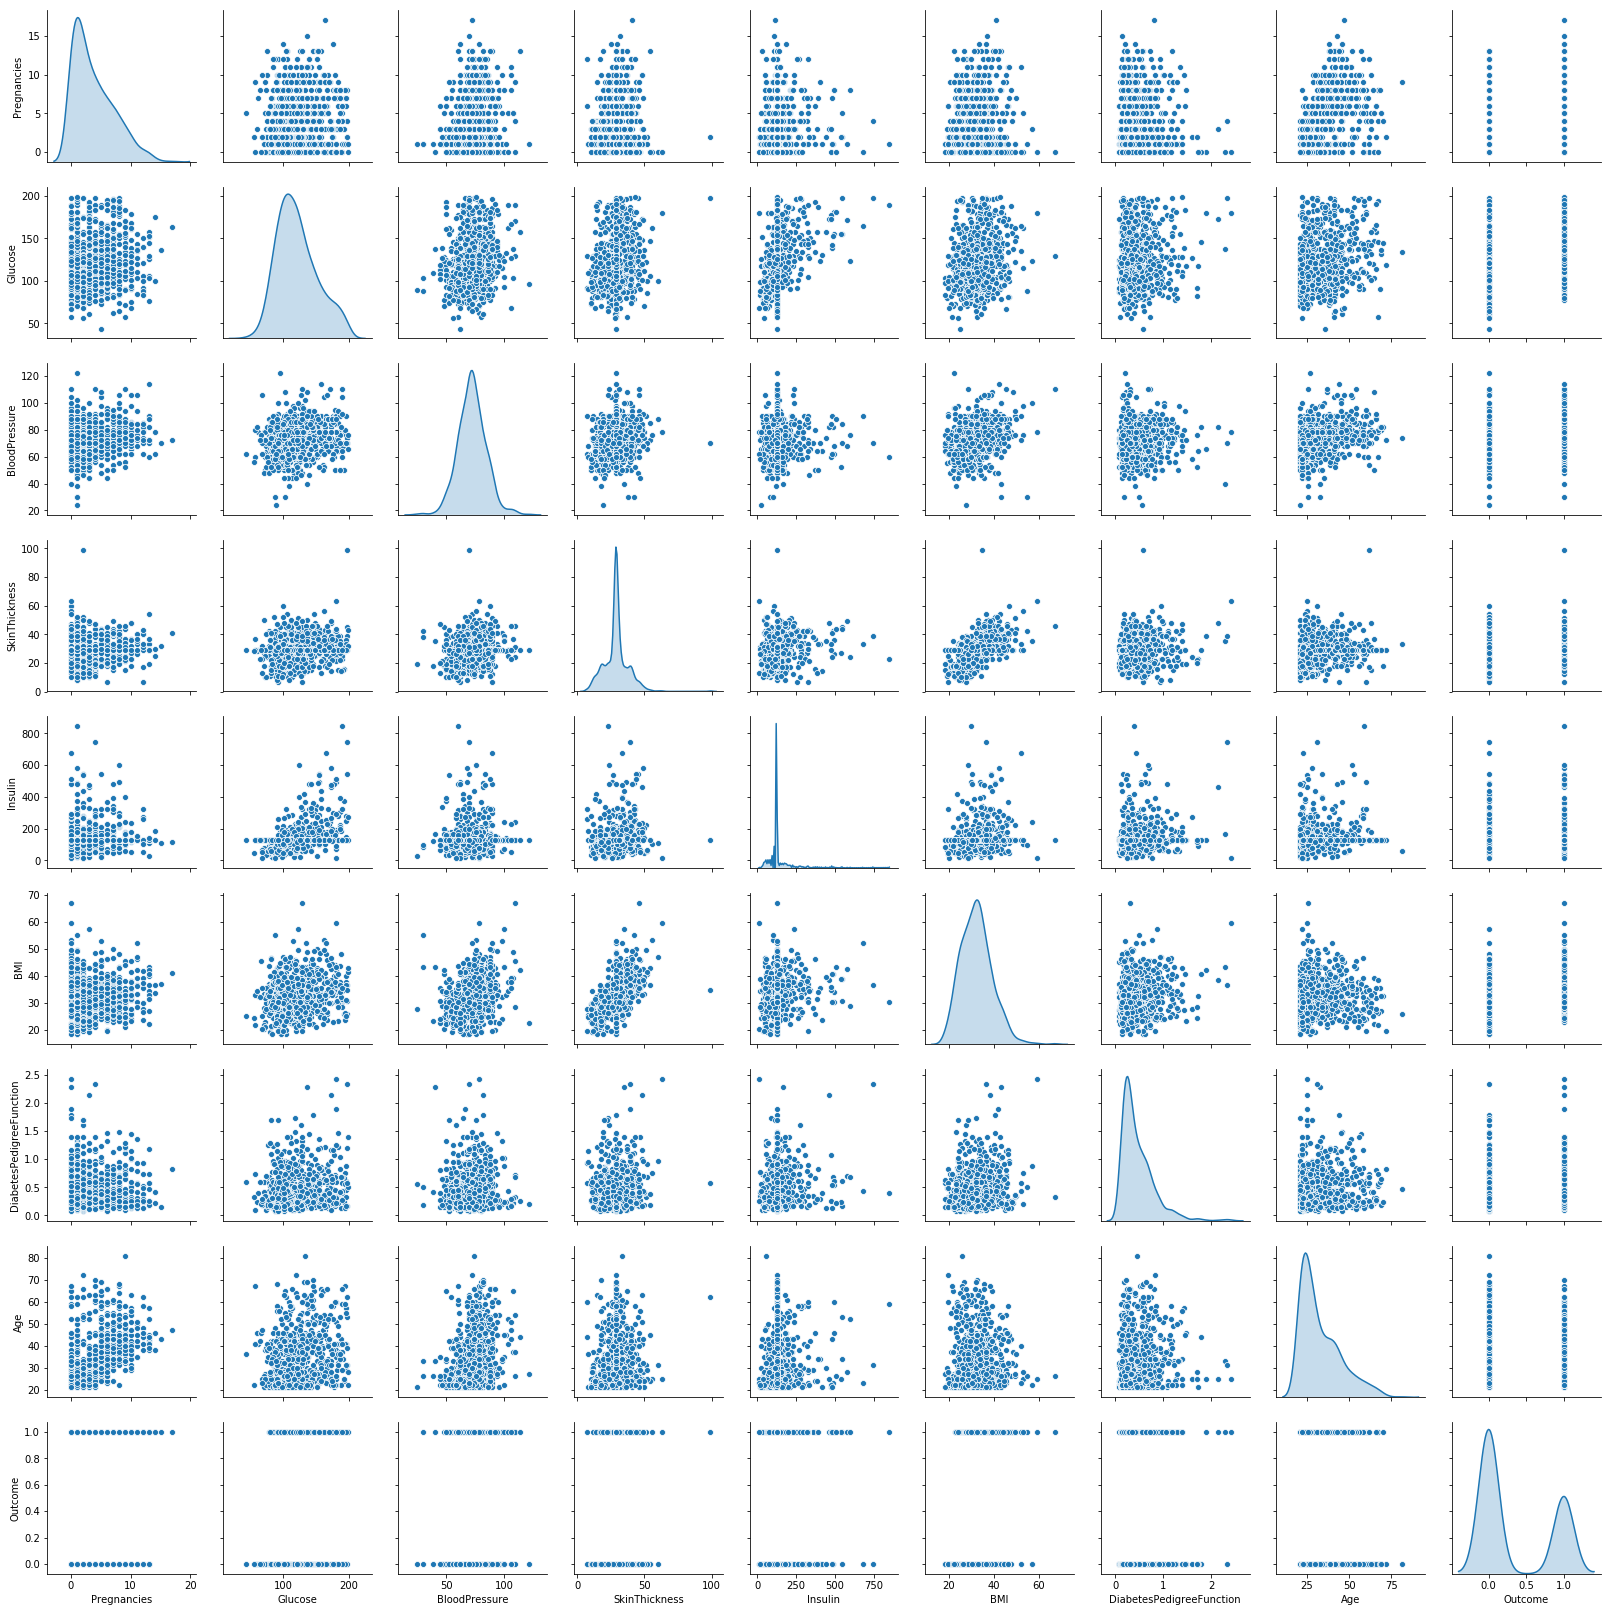

In [15]:
sns.pairplot(pima_df,diag_kind='kde')

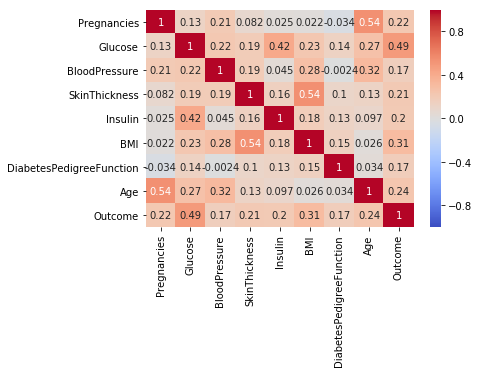

In [16]:
sns.heatmap(pima_df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

#Inferences
BloodPressure and SkinThickness have very less correlation with Outcome
other variables have significant correlation with Outcome

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [17]:
y = pima_df[['Outcome']]
X = pima_df.drop(['Outcome'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

In [19]:
from scipy.stats import zscore
X_train_scaled = zscore(X_train)
X_test_scaled = zscore(X_test)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [20]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

from sklearn.tree import DecisionTreeClassifier                                 
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,min_impurity_decrease=0.01)

In [21]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#Predict Model Performance

In [22]:
y_predict_test = dt_model.predict(X_test_scaled)
y_predict_train = dt_model.predict(X_train_scaled)


In [23]:
y_predict_train

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# Q10 Print the accuracy of the model & print the confusion matrix 

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
print(confusion_matrix(y_test, y_predict_test))

[[135  14]
 [ 31  51]]


In [26]:
print("Train accuracy is", accuracy_score(y_train,y_predict_train))
print("Test accuracy is", accuracy_score(y_test,y_predict_test))

Train accuracy is 0.7951582867783985
Test accuracy is 0.8051948051948052


In [27]:
X_train_scaled

array([[-1.14905103,  0.41257039, -0.41110088, ...,  1.44766172,
        -0.30737658, -0.81624885],
       [ 1.19043865,  0.11633615,  0.09196294, ..., -0.99365096,
        -0.94125464,  0.47269146],
       [ 1.48287486,  1.36710294,  0.93040263, ..., -0.26423437,
         1.14773267, -0.12881402],
       ...,
       [ 0.02069381,  0.0175914 , -0.91416469, ..., -0.08560173,
        -0.74141131,  0.12897404],
       [ 0.60556623,  1.03795379,  0.42733882, ...,  2.01333173,
         0.33586914, -0.55846079],
       [-1.14905103,  0.05050631, -0.24341294, ..., -0.77036017,
        -0.65397986,  0.21490339]])

Print the feature importance of the decision model - Optional

Text(0.5, 1.0, 'Feature Importance')

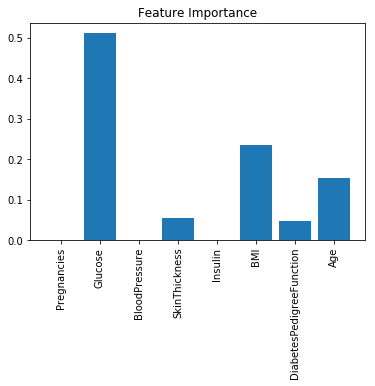

In [30]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.bar(range(len(X_test.columns.values)), dt_model.feature_importances_)
plt.xticks(range(len(X_test.columns.values)),X_test.columns.values, rotation= 90)
plt.title('Feature Importance')

In [37]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Pregnancies               0.000000
Glucose                   0.511741
BloodPressure             0.000000
SkinThickness             0.054189
Insulin                   0.000000
BMI                       0.234082
DiabetesPedigreeFunction  0.047204
Age                       0.152783


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [73]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# Set the random state for reproductibility
fit_rf = RandomForestClassifier(random_state=42)

In [149]:
# Cleaning test sets to avoid future warning messages
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [150]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,random_state=42)
rfcl = rfcl.fit(X_train_scaled, y_train)


In [151]:
y_pred_test = rfcl.predict_proba(X_test_scaled)[:,1]
y_pred_train = rfcl.predict_proba(X_train_scaled)[:,1]

In [152]:
from sklearn.metrics import roc_auc_score
print("train auc is",roc_auc_score(y_train,y_pred_train))

train auc is 1.0


In [153]:
print("test auc is",roc_auc_score(y_test,y_pred_test))

test auc is 0.8868063512849893


# Hyperparameter Optimization GridsearchCV

In [154]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n',
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  10.70


C:\Users\shank\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [155]:
# Set best parameters given by grid search
fit_rf.set_params(bootstrap = True,criterion = 'entropy',
                  max_features = None,
                  max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [156]:
## Understanding OOB accuracy

rfcl = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=True)
rfcl = rfcl.fit(X_train, y_train)

In [157]:
from sklearn.metrics import roc_auc_score
rfcl.oob_score_

0.7411545623836127

In [158]:
y_test

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [159]:
print("OOB auc is",roc_auc_score(y_train, rfcl.oob_decision_function_[:,1]))

OOB auc is 0.8049505253806329


# CROSS VALIDATION

In [190]:
from sklearn.model_selection import KFold
seed = 7
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=seed)


rf_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(rf_model, X, y, cv=kfold)
print("Accuracy Mean: %0.2f Std :(+/- %0.2f) " % (results.mean(), results.std()))

Accuracy Mean: 0.77 Std :(+/- 0.06) 


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [162]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier


kfold = KFold(n_splits=10, random_state=431)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=121)


In [163]:
bgcl = ada_model.fit(X_train, y_train)


In [164]:
y_predict_prob_bgc = bgcl.predict_proba(X_test)[:,1]

In [165]:
roc_auc_score(y_test,y_predict_prob_bgc)

0.8327058438369619

In [188]:
results = model_selection.cross_val_score(ada_model, X, y, cv=kfold)
print("Accuracy Mean: %0.2f Std :(+/- %0.2f) " % (results.mean(), results.std()))

Accuracy Mean: 0.74 Std :(+/- 0.04) 


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [167]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

#Change the n_estimators in the below from 100,500,1000 etc., that is the no. of decision trees getting created
# This is the bagging concept of changing the no. of samples
# This parameter also needs to be tuned, will avoid the overfitting issue with decision trees
dt_model = DecisionTreeClassifier()
# even if X_train_scaled is used the accuracy is same
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=500)
bgcl = bgcl.fit(X_train_scaled, y_train)


In [168]:
y_predict_prob_bgc = bgcl.predict_proba(X_test_scaled)[:,1]

In [169]:
roc_auc_score(y_test,y_predict_prob_bgc)

0.8802586348011131

# CROSS VALIDATON -ANOTHER METHOD USING FUNCTIONS

In [187]:
kfold = model_selection.KFold(n_splits=5, random_state=117)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
from scipy.stats import zscore
X_scaled = zscore(X)
# even if X_scaled is used the accuracy is same
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy Mean: %0.2f Std :(+/- %0.2f) " % (results.mean(), results.std()))

Accuracy Mean: 0.77 Std :(+/- 0.04) 


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [181]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=7)
grad_model = GradientBoostingClassifier(n_estimators=100, random_state=7)
results = model_selection.cross_val_score(grad_model, X, y, cv=kfold)
print("Accuracy Mean: %0.2f Std :(+/- %0.2f) " % (results.mean(), results.std()))

Accuracy Mean: 0.76 Std :(+/- 0.06) 


In [182]:

grad_model = grad_model.fit(X_train, y_train)


In [183]:
y_predict_prob_grad = grad_model.predict_proba(X_test)[:,1]

In [184]:
roc_auc_score(y_test,y_predict_prob_grad)

0.8754706171222787

In [185]:
grad_model.score(X_test,y_test)

0.7922077922077922

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [180]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())
print("Accuracy Mean: %0.2f Std :(+/- %0.2f) " % (results.mean(), results.std()))

0.7395420369104581
Accuracy Mean: 0.74 Std :(+/- 0.06) 


In [179]:
# Example of hard voting 
from sklearn.ensemble import VotingClassifier
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Create classifiers
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
lg = LogisticRegression()
clf = [rf, dt,lg, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Decision Tree', dt),('Logistic', lg), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, dt,lg, knn, svc, rg, eclf], ['Random Forest','Decision Tree', 'Logistic', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.75 (+/- 0.05) [Random Forest]
Accuracy: 0.70 (+/- 0.06) [Decision Tree]
Accuracy: 0.76 (+/- 0.04) [Logistic]
Accuracy: 0.72 (+/- 0.03) [KNeighbors]
Accuracy: 0.65 (+/- 0.00) [SVC]
Accuracy: 0.77 (+/- 0.04) [Ridge Classifier]
Accuracy: 0.76 (+/- 0.04) [Ensemble]
